In [1]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:520: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:521: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/jupyterlab/conda/envs/python/lib/python3

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [2]:
import tensorflow as tf

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


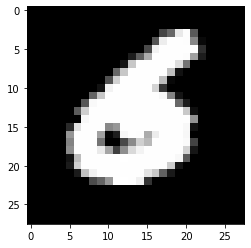

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt 
batch_xs, batch_ys = mnist.train.next_batch(1)
X = batch_xs
X = X.reshape([28, 28]);
print(batch_ys)
plt.gray()
plt.imshow(X)

In [9]:
x = tf.placeholder(tf.float32, [None, 28*28])
W = tf.Variable(tf.zeros([28*28, 10]))
b = tf.Variable(tf.zeros([10]))
y = tf.nn.softmax(tf.matmul(x, W) + b)

In [10]:
y_ = tf.placeholder(tf.float32, [None, 10])

cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))

train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

In [11]:
sess = tf.InteractiveSession()

In [12]:
tf.global_variables_initializer().run()

In [13]:
for _ in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

In [14]:
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))

accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [15]:
print(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

0.9139


In [21]:
import numpy as np

[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
Predicted value:
[[6.3227430e-02 2.6197004e-08 9.3239927e-01 4.7429255e-04 7.3226244e-07
  1.3713735e-04 2.4878708e-04 1.3579679e-05 3.4931959e-03 5.5917544e-06]]
2


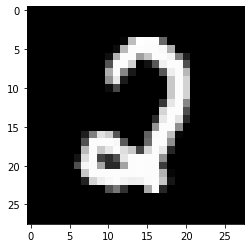

In [32]:
batch_xs, batch_ys = mnist.train.next_batch(1)
X = batch_xs

feed_dict={x: batch_xs}
y_hat = sess.run(tf.nn.softmax(tf.matmul(x, W) + b), feed_dict=feed_dict)

X = X.reshape([28, 28]);

print(batch_ys)
print("Predicted value:")
print(y_hat)
print(np.argmax(y_hat))

plt.gray()
plt.imshow(X)